<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW12/lab12_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as plt
import numpy as np
np.random.seed(123)

# 1 Getting the data: standard handwritten digit recognition task

In [3]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 2 understand the input data

# task 1: print the shape of the train input and train labels

# task 2: print the label of the 10th observation

# task 3: what is the shape of train_input 1?

# task 4: plot train_input 1


In [4]:
#Task 1
print(train_input.shape, train_labels)

(60000, 28, 28) [5 0 4 ... 5 6 8]


In [5]:
#Task 2
train_labels[10]

3

In [6]:
#Task 3
print(train_input[0].shape)

(28, 28)


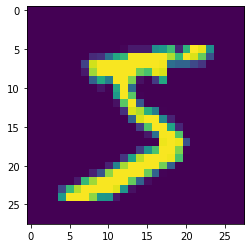

In [7]:
#Task 4
plt.imshow(train_input[0]);

This is a hand-written 5

# 3 Create the model

# task 5: create a model with 3 layers: input layer and 2 fully connected layers with 128 and 10 neurons respectively

In [8]:
model = keras.Sequential([keras.layers.Flatten( input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = tf.nn.sigmoid), 
                          keras.layers.Dense(10,activation = tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# 4 set the hyperparameters
# task 6: set a learning rate of 0.01, a loss function "sparse_categorical_crossentropy" and set the metric to "accuracy
                                              

In [0]:
model.compile(optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.6620 - acc: 0.8332
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3583 - acc: 0.9049
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3111 - acc: 0.9150
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2855 - acc: 0.9205
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2617 - acc: 0.9271


# Task 7: test the model

In [11]:
test_loss, test_acc = model.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2568 - acc: 0.9277


In [12]:
print('The accuracy of the model is %.2f%%' % (test_acc*100))

The accuracy of the model is 92.77%


# task 8 plot the 10'th test observation and its label and prediction

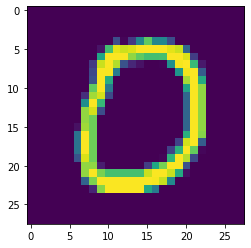

In [24]:
plt.imshow(test_input[10]);

This is a hand-written zero

In [37]:
print('The label for this drawing', test_labels[10])

The label for this drawing 0


Generate the predictions for the test data using the model

In [0]:
preds = model.predict(test_input)

In [0]:
def getPrediction(output):
    '''
    This function takes the output layer of the model and converts it
    into a single integer that the input layer is most likely to represent.
    '''
    m = max(output)
    return [i for i, j in enumerate(output) if j == m][0]

In [38]:
print('The prediction for this drawing is', getPrediction(preds[10]))

The prediction for this drawing is 0


<span style="color:red">**-1 pt: the index of 10th is 9**</span>

# task 9: find the first wrong prediction in the test set

The first wrong prediction in the set occurs at the 8th occurrence
The label for this drawing 5
The prediction for this drawing is 6


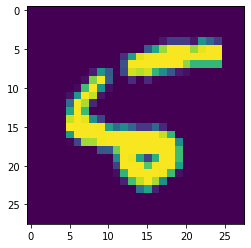

In [45]:
i = 0
while i < len(test_labels):
    if test_labels[i] != getPrediction(preds[i]):
        print('The first wrong prediction in the set occurs at the %dth occurrence' % i)
        break
    i+=1

plt.imshow(test_input[i])
print('The label for this drawing', test_labels[i])
print('The prediction for this drawing is', getPrediction(preds[i]))

#task 10: create a more complex model by adding 3 fully connected layers (you choose the size). Retrain and test the accuracy of prediction and discuss if the model is overfitting

In [48]:
model2 = keras.Sequential([keras.layers.Flatten( input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = tf.nn.sigmoid), 
                          keras.layers.Dense(64, activation = tf.nn.sigmoid),
                          keras.layers.Dense(10,activation = tf.nn.softmax)])

model2.compile(optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.fit(train_input, train_labels, epochs=5)
test_loss, test_acc = model2.evaluate(test_input, test_labels)
print('The accuracy of the model is %.2f%%' % (test_acc*100))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 1.3081 - acc: 0.7312
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5573 - acc: 0.8841
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4001 - acc: 0.9037
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3370 - acc: 0.9134
Epoch 5/5
10000/10000 [==============================] - 0s 36us/sample - loss: 0.2846 - acc: 0.9227
The accuracy of the model is 92.27%


In this model, a sigmoid layer containing 64 neurons was added between the two pre-existing hidden layers. The accuracy of the model **decreased** from 92.77% to 92.27%, which suggests that the model may be overfitting. Here, the *less complicated* model should be used.

<span style="color:red">**-2 pts: more layers require more epoachs to converge, 5 is not enough, you should make a epoach vs test accuracy plot to observe a overfitting, in your case, the only conclusion we can make is until 5th epoach, there is no overfitting yet**</span>